# Task 1 — Data Cleaning & Preprocessing (Ready for GitHub)

This notebook loads the appointments dataset, performs cleaning, computes a waiting-time feature, and saves a cleaned CSV.

**What's included:**

- Missing values & duplicates check
- Column renaming and text standardization
- Date parsing and waiting-days calculation (fixed `.dt` usage)
- Optional feature engineering and encoding (commented)
- Cleaned CSV saved as `KaggleV2_Cleaned.csv`

In [1]:
#Import Libraries and Load Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Load dataset
df=pd.read_csv(r"C:\Users\Dell\Downloads\KaggleV2-May-2016.csv")
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# 3. Quick overview
print('--- Info ---')
df.info()
print('\n--- Describe (numeric) ---')
display(df.describe())
print('\n--- First rows ---')
display(df.head())

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB

--- Describe (numeric) ---


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



--- First rows ---


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# 4. Missing values & duplicates
print('Missing values per column:\n', df.isnull().sum())
print('\nNumber of duplicate rows:', df.duplicated().sum())

Missing values per column:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Number of duplicate rows: 0


In [9]:
# 5. Clean column names (consistent, lowercase or snake_case is optional)
# We'll rename known misspellings and make column names uniform.
df.rename(columns={
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap',
    'No-show': 'No_show',
    'AppointmentID': 'AppointmentID',  # keep as-is but show example
}, inplace=True)
# Optional: make all columns lowercase with underscores
# df.columns = [c.strip().lower().replace(' ', '_').replace('-', '_') for c in df.columns]

print('Columns after rename:', df.columns.tolist())

Columns after rename: ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show']


In [11]:
# 6. Parse dates safely
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='coerce')

print('ScheduledDay nulls after parse:', df['ScheduledDay'].isnull().sum())
print('AppointmentDay nulls after parse:', df['AppointmentDay'].isnull().sum())

ScheduledDay nulls after parse: 0
AppointmentDay nulls after parse: 0


In [13]:
# 7. Standardize categorical text values
# Gender: map M/F to Male/Female and strip spaces
df['Gender'] = df['Gender'].astype(str).str.strip().str.upper().map({'M':'Male','F':'Female'})

# No_show: standardize to 'Yes'/'No' (if column exists)
if 'No_show' in df.columns:
    df['No_show'] = df['No_show'].astype(str).str.strip().str.title()

df[['Gender','No_show']].head()

,Gender,No_show
0,Female,No
1,Male,No
2,Female,No
3,Female,No
4,Female,No


In [27]:
# 8. Ensure numeric types where appropriate
if df['PatientId'].notna().all():
    df['PatientId'] = df['PatientId'].astype(int)
# Replace negative or zero PatientIds with NaN
df['PatientId'] = df['PatientId'].apply(lambda x: x if pd.notna(x) and x > 0 else np.nan)

# Convert to integer safely (nullable type keeps NaNs)
df['PatientId'] = df['PatientId'].astype('Int64')

# Optional: drop rows with missing PatientId
df = df.dropna(subset=['PatientId'])

# Age to integer (if safe)
if df['Age'].notna().all():
    df['Age'] = df['Age'].astype(int)

df[['PatientId','Age']].dtypes

C:\Users\Dell\AppData\Local\Temp\ipykernel_25280\956007982.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)


PatientId    Int64
Age          int32
dtype: object

In [29]:
# 9. Waiting time (days) between scheduling and appointment — correct use of .dt
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

print('WaitingDays: min, max, mean =', df['WaitingDays'].min(), df['WaitingDays'].max(), df['WaitingDays'].mean())

# Handle negative values if they exist (optional).
neg = (df['WaitingDays'] < 0).sum()
if neg > 0:
    print(f'Warning: Found {neg} rows with negative WaitingDays. Setting negative values to 0.')
    df.loc[df['WaitingDays'] < 0, 'WaitingDays'] = 0

df['WaitingDays'].describe()

WaitingDays: min, max, mean = -1 110 7.702702702702703


C:\Users\Dell\AppData\Local\Temp\ipykernel_25280\17817876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days


count    259.000000
mean       8.046332
std       12.891233
min        0.000000
25%        0.000000
50%        3.000000
75%       11.500000
max      110.000000
Name: WaitingDays, dtype: float64

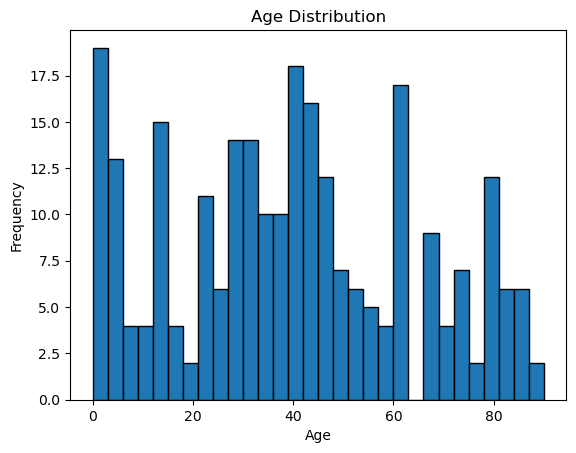

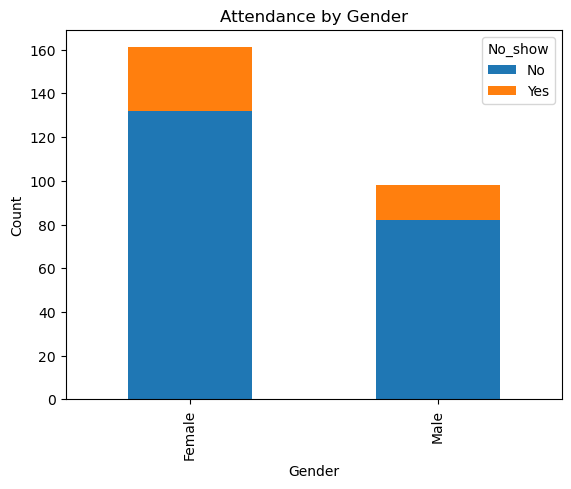

In [31]:

# Age distribution
df['Age'].plot(kind='hist', bins=30, edgecolor='black', title='Age Distribution')
plt.xlabel('Age')
plt.show()

# Attendance by Gender
if 'No_show' in df.columns:
    df.groupby(['Gender','No_show']).size().unstack().plot(kind='bar', stacked=True)
    plt.title('Attendance by Gender')
    plt.ylabel('Count')
    plt.show()

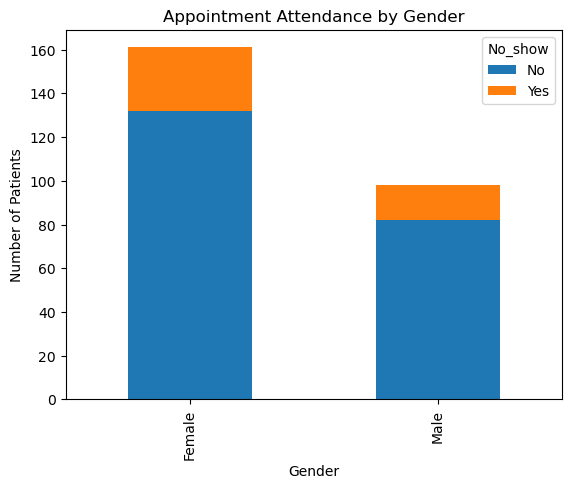

In [37]:
#  count plot of No_show by Gender
df.groupby(['Gender','No_show']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Appointment Attendance by Gender')
plt.ylabel('Number of Patients')
plt.show()

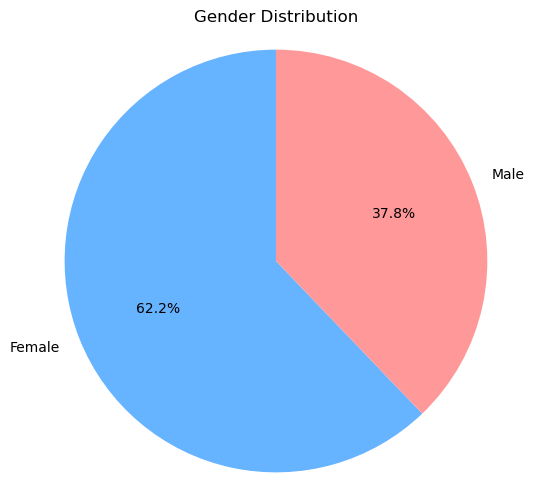

In [45]:
# Pie chart for Gender distribution
data = df['Gender'].value_counts()  
plt.figure(figsize=(6,6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

In [35]:
# 12. Save cleaned dataset
df.to_csv('medical_file.csv', index=False)
print("Cleaned dataset saved as medical_file.csv")
df.head()

Cleaned dataset saved as medical_file.csv


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
117,744463183,5539219,Female,2016-04-01 14:27:30+00:00,2016-04-29 00:00:00+00:00,34,SANTO ANTÔNIO,1,0,0,0,0,1,No,27
463,522886422,5633872,Female,2016-04-28 09:58:32+00:00,2016-04-29 00:00:00+00:00,66,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,0
706,318385314,5559991,Female,2016-04-08 08:22:02+00:00,2016-04-29 00:00:00+00:00,31,JESUS DE NAZARETH,0,0,0,0,0,1,No,20
769,1781488635,5638166,Female,2016-04-29 07:46:23+00:00,2016-04-29 00:00:00+00:00,14,JARDIM CAMBURI,0,0,0,0,0,0,No,0
1038,1335236927,5639853,Male,2016-04-29 09:42:18+00:00,2016-04-29 00:00:00+00:00,2,DO CABRAL,0,0,0,0,0,0,No,0


## Summary of changes

- Renamed misspelled columns: `Hipertension` -> `Hypertension`, `Handcap` -> `Handicap`, `No-show` -> `No_show`.
- Converted `ScheduledDay` and `AppointmentDay` to `datetime` using `pd.to_datetime(..., errors='coerce')`.
- Standardized `Gender` and `No_show` text values.
- Calculated `WaitingDays` safely using datetime subtraction and `.dt.days` (and handled negative values).
- Ensured numeric columns are proper integer types where safe.

This notebook is ready to be uploaded to GitHub as a clean, documented deliverable.